In [1]:
!nvidia-smi


Tue Nov 26 11:33:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
pip install ultralytics
from ultralytics import YOLO
import ultralytics

pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="C4s11Mqy5NDVVxrhixEe")
project = rf.workspace("roboflow-100").project("construction-safety-gsnvb")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 47.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to construction-safety-2 in yolov11:: 100%|██████████| 2424/2424 [00:00<00:00, 3363.04it/s]


In [3]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=20 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 336MB/s]
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/construction-safety-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

In [4]:

from IPython.display import Image

In [5]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/construction-safety-2/valid/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100% 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.90it/s]
                   all        119        715      0.818       0.78      0.836      0.492
                helmet        117        232      0.913      0.909      0.931       0.56
             no-helmet          6         11      0.534      0.364       0.52       0.23
               no-vest         52         90      0.815        0.8      0.839      0.445
                person        115        241      0.919      0.934      0.948      0.665
                  vest         74        141      0.909      0.894      0.943       0.56
Speed: 2.7ms preprocess, 7.3ms inference, 

In [6]:

!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/90 /content/construction-safety-2/test/images/ppe_0000_jpg.rf.c102a9a7c8dec01565a8f95ff295974c.jpg: 448x640 1 helmet, 1 person, 1 vest, 51.7ms
image 2/90 /content/construction-safety-2/test/images/ppe_0004_jpg.rf.c3265071237f64a4f0c3e1bf3048f923.jpg: 640x640 3 helmets, 3 persons, 2 vests, 10.4ms
image 3/90 /content/construction-safety-2/test/images/ppe_0008_jpg.rf.356284e8df05dcd239cb91cf53b51c83.jpg: 448x640 2 helmets, 1 no-helmet, 4 persons, 5 vests, 9.8ms
image 4/90 /content/construction-safety-2/test/images/ppe_0009_jpg.rf.68866a74a26b99495ad80bc41b7a2897.jpg: 384x640 2 helmets, 2 persons, 2 vests, 46.4ms
image 5/90 /content/construction-safety-2/test/images/ppe_0013_jpg.rf.a88d9ccde80be57995e344d94a033f3a.jpg: 448x640 1 helmet, 1 person, 9.1ms
image 6/90 /content/construction-safety-2/test/images/ppe_0014_jpg.

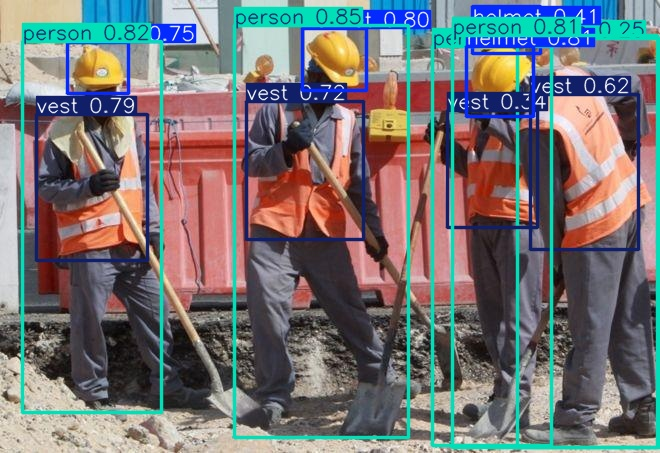

In [7]:
Image("/content/runs/detect/predict/ppe_0921_jpg.rf.20cac6a759499fb2397ba49f8661241b.jpg")

In [8]:

!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=/content/video2.avi save=True

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/349) /content/video2.avi: 384x640 4 helmets, 1 no-vest, 3 persons, 2 vests, 45.5ms
video 1/1 (frame 2/349) /content/video2.avi: 384x640 4 helmets, 1 no-vest, 3 persons, 2 vests, 9.9ms
video 1/1 (frame 3/349) /content/video2.avi: 384x640 4 helmets, 1 no-vest, 3 persons, 2 vests, 9.1ms
video 1/1 (frame 4/349) /content/video2.avi: 384x640 4 helmets, 1 no-vest, 3 persons, 2 vests, 9.0ms
video 1/1 (frame 5/349) /content/video2.avi: 384x640 4 helmets, 1 no-vest, 3 persons, 2 vests, 8.8ms
video 1/1 (frame 6/349) /content/video2.avi: 384x640 4 helmets, 1 no-vest, 3 persons, 2 vests, 8.7ms
video 1/1 (frame 7/349) /content/video2.avi: 384x640 4 helmets, 1 no-vest, 3 persons, 2 vests, 8.5ms
video 1/1 (frame 8/349) /content/video2.avi: 384x640 4 helmets, 1 no-vest, 3 persons, 2 vests, 8.7ms
video 1/1 (frame 9/349) /

In [ ]:

from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/video2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [11]:

!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=/content/video1.avi save=True

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/1940) /content/video1.avi: 384x640 (no detections), 47.9ms
video 1/1 (frame 2/1940) /content/video1.avi: 384x640 (no detections), 9.1ms
video 1/1 (frame 3/1940) /content/video1.avi: 384x640 (no detections), 8.5ms
video 1/1 (frame 4/1940) /content/video1.avi: 384x640 (no detections), 8.7ms
video 1/1 (frame 5/1940) /content/video1.avi: 384x640 (no detections), 8.7ms
video 1/1 (frame 6/1940) /content/video1.avi: 384x640 (no detections), 8.8ms
video 1/1 (frame 7/1940) /content/video1.avi: 384x640 (no detections), 8.9ms
video 1/1 (frame 8/1940) /content/video1.avi: 384x640 (no detections), 8.6ms
video 1/1 (frame 9/1940) /content/video1.avi: 384x640 (no detections), 12.7ms
video 1/1 (frame 10/1940) /content/video1.avi: 384x640 (no detections), 8.6ms
video 1/1 (frame 11/1940) /content/video1.avi: 384x640 (no de

In [ ]:

from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = ''

# Compressed video path
compressed_path = "/content/runs/detect/predict3/video1.avi"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Buffered data was truncated after reaching the output size limit.

In [12]:
git clone https://github.com/Suhail-Bns/PPE_Detect.git


SyntaxError: invalid syntax (<ipython-input-12-05bb7db5ee90>, line 1)